# Breast Cancer Prediction

**Breast Cancer Prediction** is a classification task aimed at predicting the diagnosis of a breast mass as either malignant or benign. The dataset used for this prediction consists of features computed from a digitized image of a fine needle aspirate (FNA) of the breast mass. These features describe various characteristics of the cell nuclei present in the image.

The dataset contains the following information for each instance:

1. ID number: A unique identifier for each sample.
2. Diagnosis: The target variable indicating the diagnosis, where 'M' represents malignant and 'B' represents benign.

For each cell nucleus, ten real-valued features are computed, which are:

1. Radius: The mean distance from the center to points on the perimeter of the nucleus.
2. Texture: The standard deviation of gray-scale values in the nucleus.
3. Perimeter: The perimeter of the nucleus.
4. Area: The area of the nucleus.
5. Smoothness: A measure of local variation in radius lengths.
6. Compactness: Computed as the square of the perimeter divided by the area minus 1.0.
7. Concavity: Describes the severity of concave portions of the nucleus contour.
8. Concave points: Represents the number of concave portions of the nucleus contour.
9. Symmetry: Measures the symmetry of the nucleus.
10. Fractal dimension: This feature approximates the "coastline" of the nucleus, using the concept of fractal geometry.

These features provide quantitative measurements that can be used to assess the characteristics of cell nuclei and aid in distinguishing between malignant and benign breast masses. By training a machine learning model on this dataset, it is possible to develop a predictive model that can assist in the early detection and diagnosis of breast cancer.

In [1]:
# importing the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#importing the dataset
df = pd.read_csv('data.csv')
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [3]:
df.tail()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,NaN
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,NaN
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,NaN
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,NaN
568,92751,B,7.76,24.54,47.92,181.0,0.05263,0.04362,0.00000,0.00000,...,30.37,59.16,268.6,0.08996,0.06444,0.0000,0.0000,0.2871,0.07039,NaN


## Data Preprocessing Part 1

In [4]:
# dropping unnecessary columns
df.drop(['Unnamed: 32','id'],axis=1,inplace=True)

In [5]:
#checking for the missing values
df.isnull().sum()

diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

In [6]:
#checking the data types of the columns
df.dtypes

diagnosis                   object
radius_mean                float64
texture_mean               float64
perimeter_mean             float64
area_mean                  float64
smoothness_mean            float64
compactness_mean           float64
concavity_mean             float64
concave points_mean        float64
symmetry_mean              float64
fractal_dimension_mean     float64
radius_se                  float64
texture_se                 float64
perimeter_se               float64
area_se                    float64
smoothness_se              float64
compactness_se             float64
concavity_se               float64
concave points_se          float64
symmetry_se                float64
fractal_dimension_se       float64
radius_worst               float64
texture_worst              float64
perimeter_worst            float64
area_worst                 float64
smoothness_worst           float64
compactness_worst          float64
concavity_worst            float64
concave points_worst

In [7]:
# checking the data description
df.describe().T

,count,mean,std,min,25%,50%,75%,max
radius_mean,569.0,14.127292,3.524049,6.981000,11.700000,13.370000,15.780000,28.11000
texture_mean,569.0,19.289649,4.301036,9.710000,16.170000,18.840000,21.800000,39.28000
perimeter_mean,569.0,91.969033,24.298981,43.790000,75.170000,86.240000,104.100000,188.50000
area_mean,569.0,654.889104,351.914129,143.500000,420.300000,551.100000,782.700000,2501.00000
smoothness_mean,569.0,0.096360,0.014064,0.052630,0.086370,0.095870,0.105300,0.16340
compactness_mean,569.0,0.104341,0.052813,0.019380,0.064920,0.092630,0.130400,0.34540
concavity_mean,569.0,0.088799,0.079720,0.000000,0.029560,0.061540,0.130700,0.42680
concave points_mean,569.0,0.048919,0.038803,0.000000,0.020310,0.033500,0.074000,0.20120
symmetry_mean,569.0,0.181162,0.027414,0.106000,0.161900,0.179200,0.195700,0.30400
fractal_dimension_mean,569.0,0.062798,0.007060,0.049960,0.057700,0.061540,0.066120,0.09744


## Exploratory Data Analysis

In [8]:
# coorelation between the columns diagnosis and the other columns
df.corr()

C:\Users\shishir.sachan\AppData\Local\Temp\ipykernel_14300\3439471216.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
radius_mean,1.000000,0.323782,0.997855,0.987357,0.170581,0.506124,0.676764,0.822529,0.147741,-0.311631,...,0.969539,0.297008,0.965137,0.941082,0.119616,0.413463,0.526911,0.744214,0.163953,0.007066
texture_mean,0.323782,1.000000,0.329533,0.321086,-0.023389,0.236702,0.302418,0.293464,0.071401,-0.076437,...,0.352573,0.912045,0.358040,0.343546,0.077503,0.277830,0.301025,0.295316,0.105008,0.119205
perimeter_mean,0.997855,0.329533,1.000000,0.986507,0.207278,0.556936,0.716136,0.850977,0.183027,-0.261477,...,0.969476,0.303038,0.970387,0.941550,0.150549,0.455774,0.563879,0.771241,0.189115,0.051019
area_mean,0.987357,0.321086,0.986507,1.000000,0.177028,0.498502,0.685983,0.823269,0.151293,-0.283110,...,0.962746,0.287489,0.959120,0.959213,0.123523,0.390410,0.512606,0.722017,0.143570,0.003738
smoothness_mean,0.170581,-0.023389,0.207278,0.177028,1.000000,0.659123,0.521984,0.553695,0.557775,0.584792,...,0.213120,0.036072,0.238853,0.206718,0.805324,0.472468,0.434926,0.503053,0.394309,0.499316
compactness_mean,0.506124,0.236702,0.556936,0.498502,0.659123,1.000000,0.883121,0.831135,0.602641,0.565369,...,0.535315,0.248133,0.590210,0.509604,0.565541,0.865809,0.816275,0.815573,0.510223,0.687382
concavity_mean,0.676764,0.302418,0.716136,0.685983,0.521984,0.883121,1.000000,0.921391,0.500667,0.336783,...,0.688236,0.299879,0.729565,0.675987,0.448822,0.754968,0.884103,0.861323,0.409464,0.514930
concave points_mean,0.822529,0.293464,0.850977,0.823269,0.553695,0.831135,0.921391,1.000000,0.462497,0.166917,...,0.830318,0.292752,0.855923,0.809630,0.452753,0.667454,0.752399,0.910155,0.375744,0.368661
symmetry_mean,0.147741,0.071401,0.183027,0.151293,0.557775,0.602641,0.500667,0.462497,1.000000,0.479921,...,0.185728,0.090651,0.219169,0.177193,0.426675,0.473200,0.433721,0.430297,0.699826,0.438413
fractal_dimension_mean,-0.311631,-0.076437,-0.261477,-0.283110,0.584792,0.565369,0.336783,0.166917,0.479921,1.000000,...,-0.253691,-0.051269,-0.205151,-0.231854,0.504942,0.458798,0.346234,0.175325,0.334019,0.767297


<Axes: >

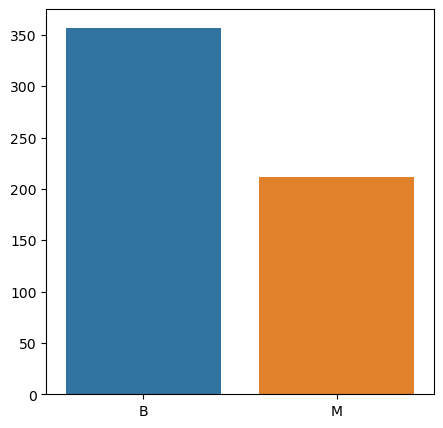

In [9]:
# bar plot for the number of diagnosis
plt.figure(figsize=(5,5))
sns.barplot(x = df['diagnosis'].value_counts().index, y = df['diagnosis'].value_counts().values)

In [10]:
df['diagnosis'].value_counts().index, df['diagnosis'].value_counts().values

(Index(['B', 'M'], dtype='object'), array([357, 212], dtype=int64))

C:\Users\shishir.sachan\AppData\Local\Temp\ipykernel_14300\2398556429.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot=True)


<Axes: >

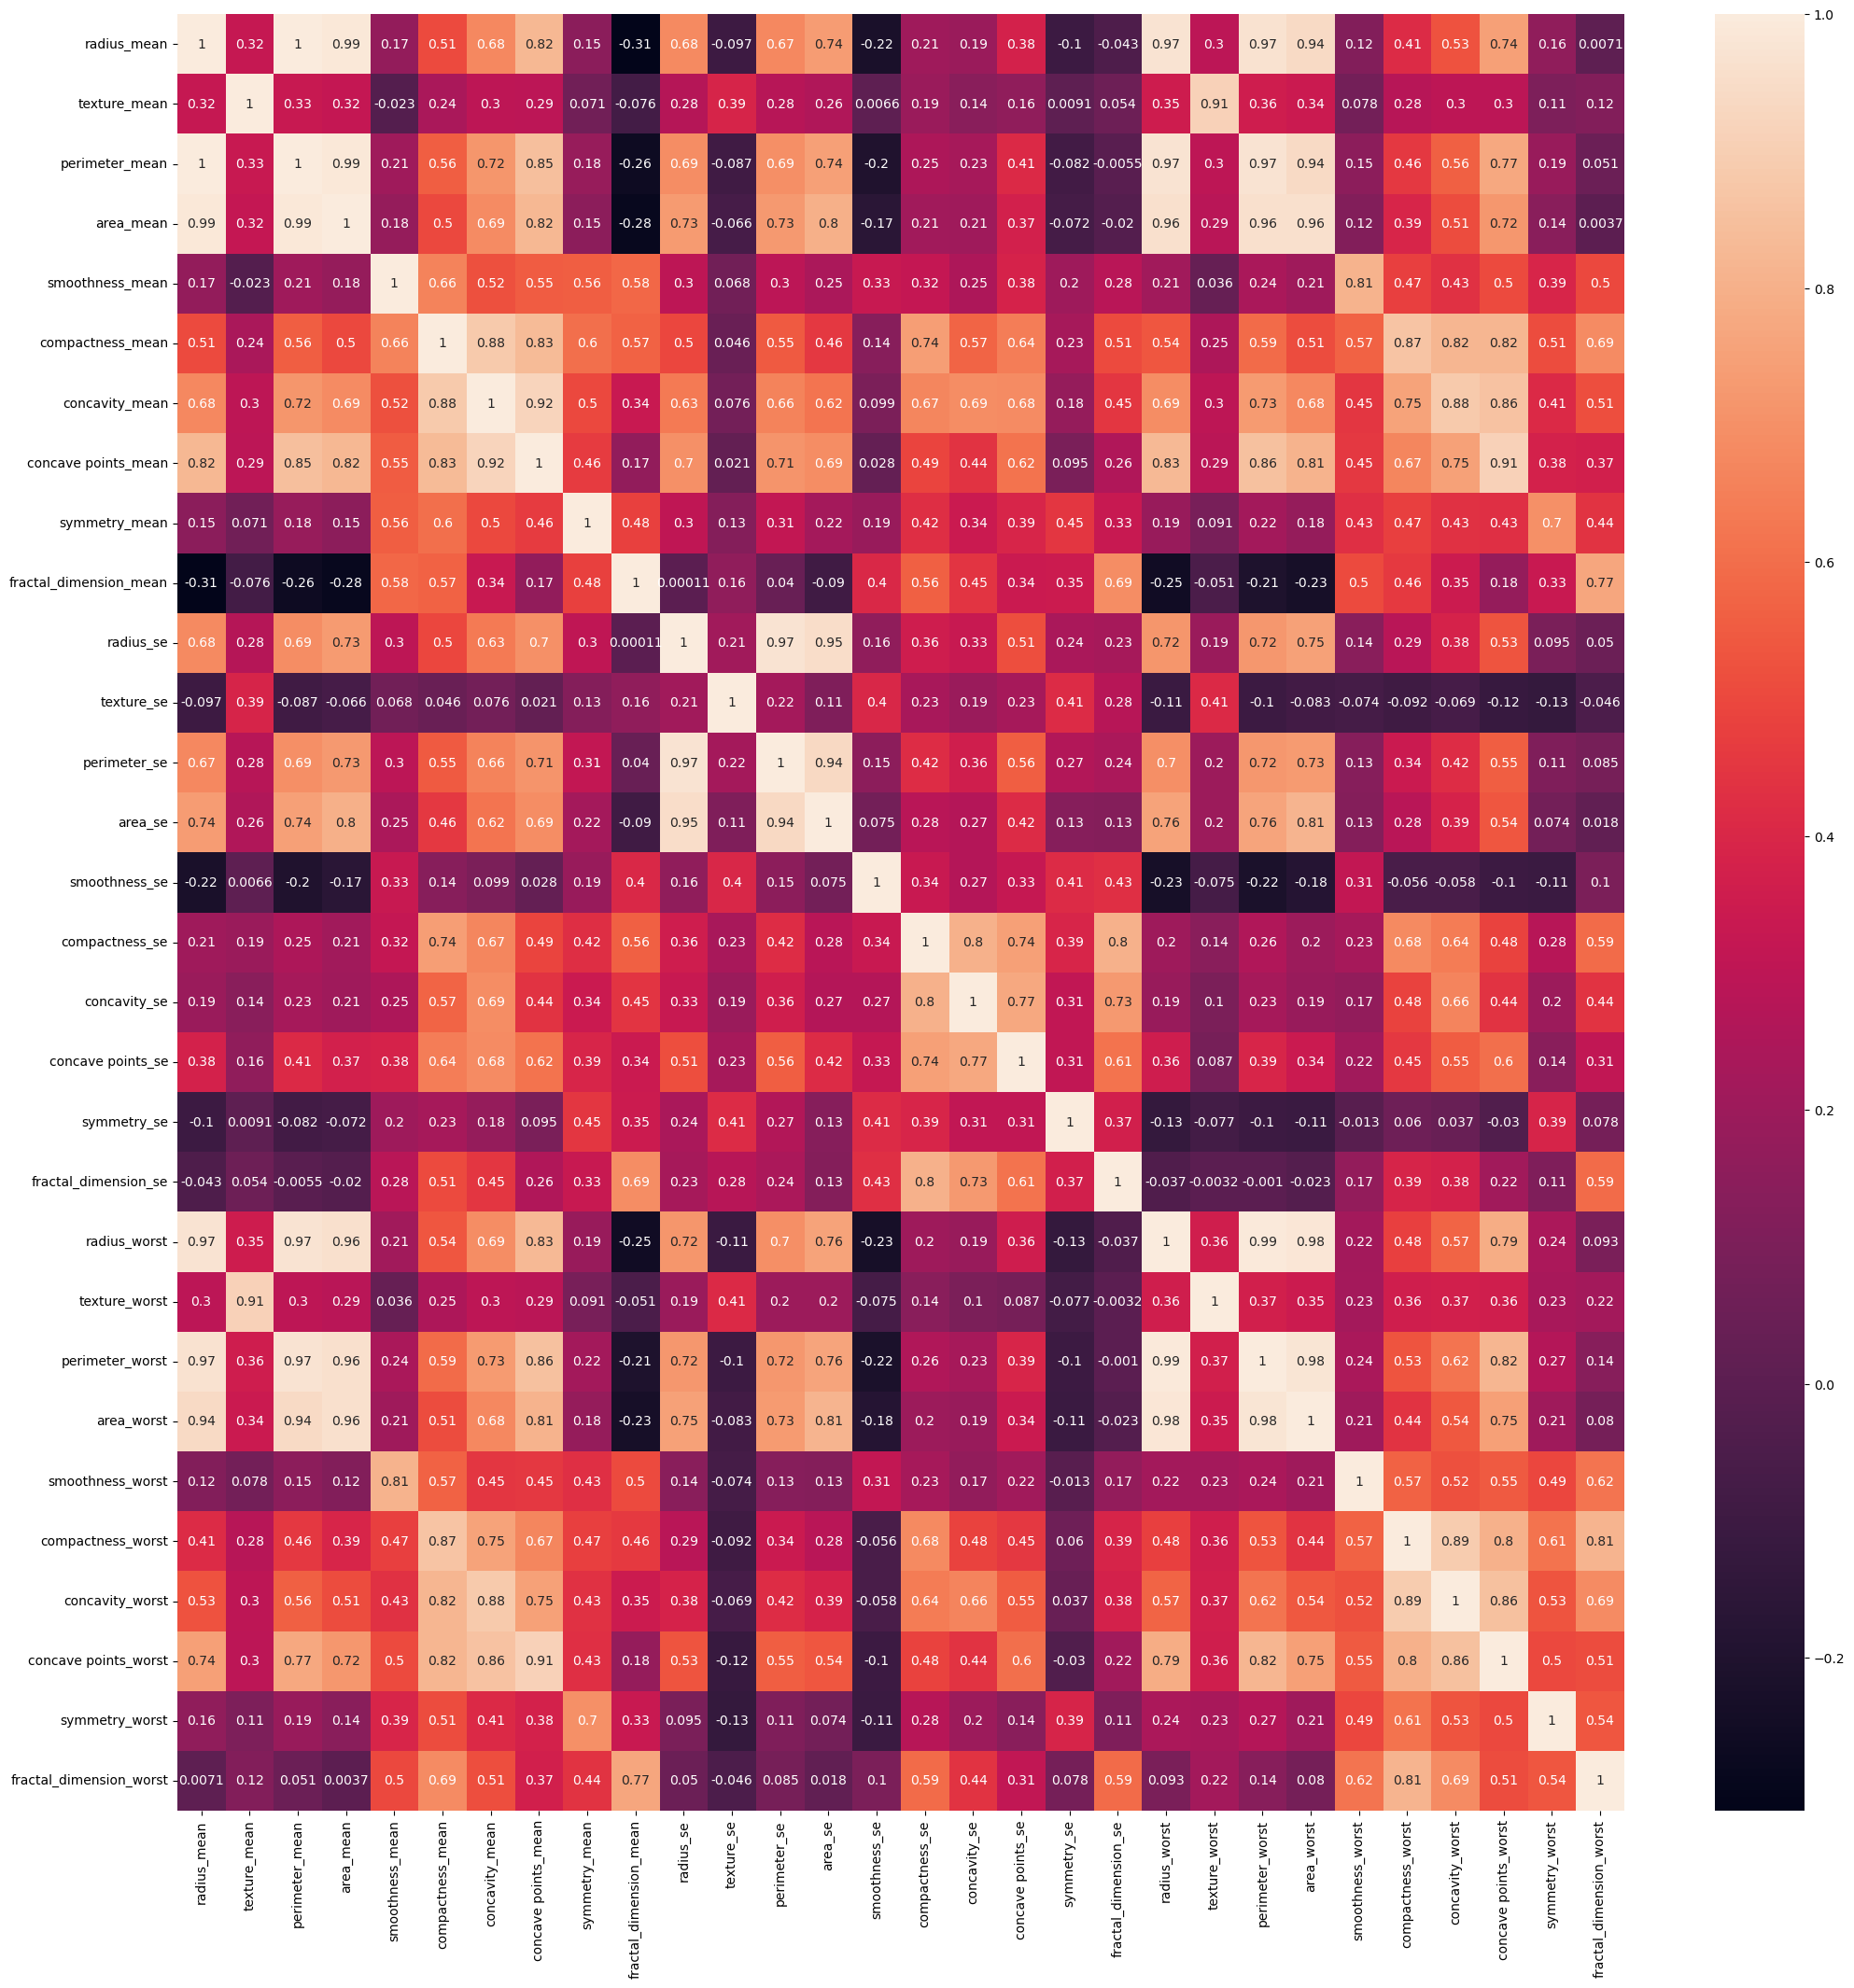

In [11]:
# create a heatmap to check the correlation
plt.figure(figsize=(25,25))
sns.heatmap(df.corr(),annot=True)

## Train Test Split

In [12]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(df.drop(['diagnosis'],axis=1),df['diagnosis'],test_size=0.3,random_state=42)

## Using Decision Tree Classifier

In [13]:
np.isnan(df.any()) #and gets False

diagnosis                  False
radius_mean                False
texture_mean               False
perimeter_mean             False
area_mean                  False
smoothness_mean            False
compactness_mean           False
concavity_mean             False
concave points_mean        False
symmetry_mean              False
fractal_dimension_mean     False
radius_se                  False
texture_se                 False
perimeter_se               False
area_se                    False
smoothness_se              False
compactness_se             False
concavity_se               False
concave points_se          False
symmetry_se                False
fractal_dimension_se       False
radius_worst               False
texture_worst              False
perimeter_worst            False
area_worst                 False
smoothness_worst           False
compactness_worst          False
concavity_worst            False
concave points_worst       False
symmetry_worst             False
fractal_di

In [14]:
np.isfinite(df.all()) #and gets Tru

diagnosis                  True
radius_mean                True
texture_mean               True
perimeter_mean             True
area_mean                  True
smoothness_mean            True
compactness_mean           True
concavity_mean             True
concave points_mean        True
symmetry_mean              True
fractal_dimension_mean     True
radius_se                  True
texture_se                 True
perimeter_se               True
area_se                    True
smoothness_se              True
compactness_se             True
concavity_se               True
concave points_se          True
symmetry_se                True
fractal_dimension_se       True
radius_worst               True
texture_worst              True
perimeter_worst            True
area_worst                 True
smoothness_worst           True
compactness_worst          True
concavity_worst            True
concave points_worst       True
symmetry_worst             True
fractal_dimension_worst    True
dtype: b

In [15]:
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier()
dtree.fit(X_train,y_train)

DecisionTreeClassifier()

In [16]:
#predicting the diagnosis
y_pred = dtree.predict(X_test)

## Model Evaluation

In [17]:
# printing samples from predicted and actual values
print('Predicted values: ',y_pred[:10])
print('Actual values: ',y_test[:10])

Predicted values:  ['B' 'M' 'M' 'B' 'B' 'M' 'M' 'M' 'B' 'B']
Actual values:  204    B
70     M
131    M
431    B
540    B
567    M
369    M
29     M
81     B
477    B
Name: diagnosis, dtype: object


In [18]:
# model evaluation 
print(dtree.score(X_test,y_test))


0.9473684210526315


## Using logistic regression

In [19]:
from sklearn.linear_model import LogisticRegression
logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)

C:\Users\shishir.sachan\AppData\Local\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [20]:
yhat = logmodel.predict(X_test)

## Model Evaluation

In [21]:
# printing samples from predicted and actual values
print('Predicted values: ',yhat[:10])
print('Actual values: ',y_test[:10])

Predicted values:  ['B' 'M' 'M' 'B' 'B' 'M' 'M' 'M' 'B' 'B']
Actual values:  204    B
70     M
131    M
431    B
540    B
567    M
369    M
29     M
81     B
477    B
Name: diagnosis, dtype: object


In [22]:
# model evaluation
print(logmodel.score(X_test,y_test))

0.9707602339181286


## Conclusion

From both the models we can see that the accuracy is 93.5% and 97% respectively. But we can see that the recall value for the logistic regression is 97% which is better than the decision tree classifier. So we can say that the logistic regression is better than the decision tree classifier.